In [2]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# View first 5 rows
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Number of rows and columns
df.shape


(10000, 14)

In [5]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [8]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


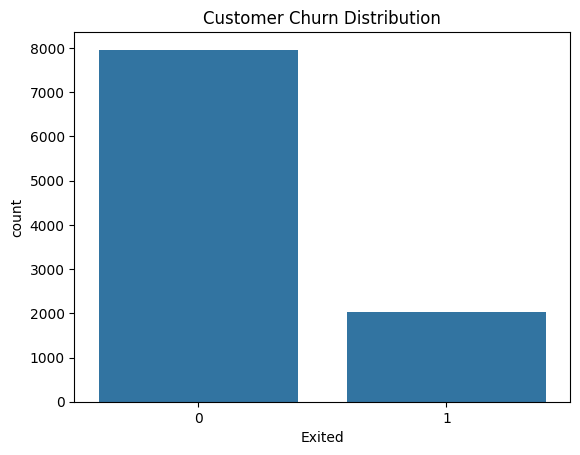

In [9]:
# Count of churn vs non-churn
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.show()


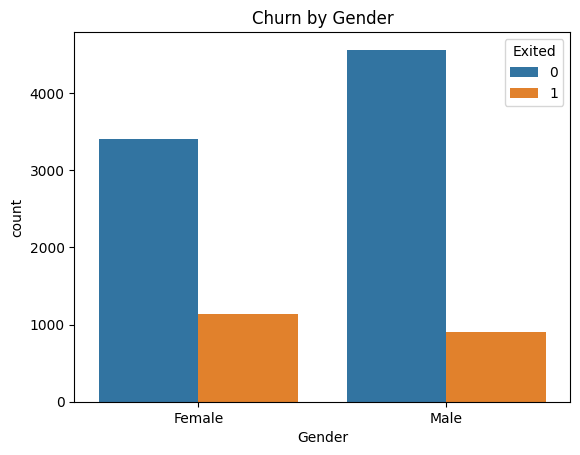

In [10]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()


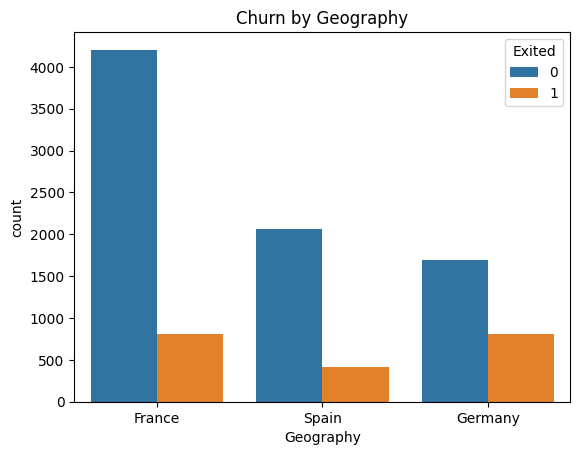

In [11]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()


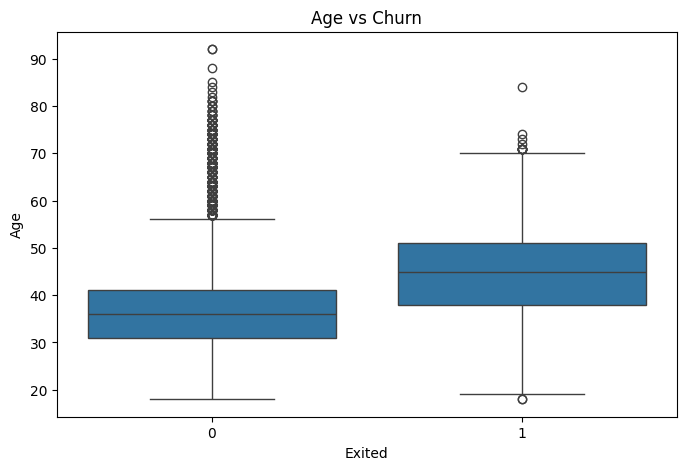

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Churn')
plt.show()


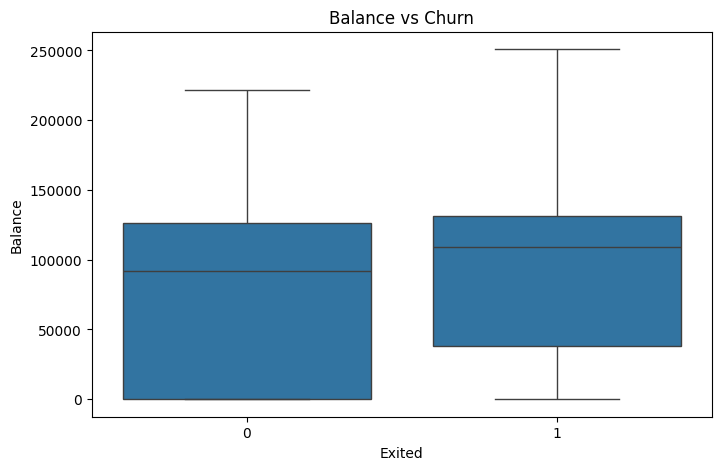

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Churn')
plt.show()


In [14]:
# Target variable
y = df['Exited']

# Feature variables
X = df.drop('Exited', axis=1)


In [15]:
X = X.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [16]:
# One-hot encoding
X = pd.get_dummies(X, drop_first=True)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression


In [20]:
# Create model
log_model = LogisticRegression()

# Train model
log_model.fit(X_train, y_train)


LogisticRegression()

In [21]:
y_pred_log = log_model.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_log)
accuracy


0.811

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log)
cm


array([[1543,   64],
       [ 314,   79]])

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [25]:
from sklearn.ensemble import RandomForestClassifier


In [26]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
y_pred_rf = rf_model.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


0.8665

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_rf)


array([[1550,   57],
       [ 210,  183]])

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [31]:
print("Logistic Regression Accuracy:", accuracy)
print("Random Forest Accuracy:", accuracy_rf)


Logistic Regression Accuracy: 0.811
Random Forest Accuracy: 0.8665


In [32]:
importances = rf_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
1,Age,0.236922
7,EstimatedSalary,0.147558
0,CreditScore,0.143338
3,Balance,0.141612
4,NumOfProducts,0.131486
2,Tenure,0.082080
6,IsActiveMember,0.040725
8,Geography_Germany,0.026190
5,HasCrCard,0.018454
10,Gender_Male,0.018421


In [33]:
# Example customer data (same order as X.columns)
new_customer = np.array([[
    600,        # CreditScore
    40,         # Age
    5,          # Tenure
    60000,      # Balance
    2,          # NumOfProducts
    1,          # HasCrCard
    1,          # IsActiveMember
    50000,      # EstimatedSalary
    1,          # Geography_Germany
    0,          # Geography_Spain
    1           # Gender_Male
]])


In [34]:
new_customer_scaled = scaler.transform(new_customer)


In [35]:
prediction = rf_model.predict(new_customer_scaled)

if prediction[0] == 1:
    print("⚠️ Customer is likely to CHURN")
else:
    print("✅ Customer is likely to STAY")


✅ Customer is likely to STAY


In [36]:
def predict_churn(customer_data):
    customer_scaled = scaler.transform(customer_data)
    prediction = rf_model.predict(customer_scaled)
    probability = rf_model.predict_proba(customer_scaled)

    if prediction[0] == 1:
        return "⚠️ Customer will CHURN", probability[0][1]
    else:
        return "✅ Customer will STAY", probability[0][1]


In [37]:
test_customer_1 = np.array([[
    450,     # CreditScore (low)
    55,      # Age (high)
    2,       # Tenure
    120000,  # Balance (high)
    1,       # NumOfProducts
    1,       # HasCrCard
    0,       # IsActiveMember (inactive ❌)
    40000,   # EstimatedSalary
    1,       # Geography_Germany
    0,       # Geography_Spain
    1        # Gender_Male
]])

predict_churn(test_customer_1)


('⚠️ Customer will CHURN', np.float64(0.96))

In [38]:
test_customer_2 = np.array([[
    720,     # CreditScore (good)
    30,      # Age (young)
    8,       # Tenure
    0,       # Balance
    2,       # NumOfProducts
    1,
    1,       # Active member ✅
    90000,
    0,
    0,
    0
]])

predict_churn(test_customer_2)


('✅ Customer will STAY', np.float64(0.03))

In [39]:
# Pick 5 random customers from test set
random_indexes = np.random.choice(len(X_test), 5)

for i in random_indexes:
    pred = rf_model.predict(X_test[i].reshape(1, -1))
    actual = y_test.iloc[i]
    print(f"Predicted: {pred[0]} | Actual: {actual}")


Predicted: 1 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 1 | Actual: 1


In [40]:
rf_model.predict_proba(X_test[:5])


array([[0.98, 0.02],
       [0.98, 0.02],
       [0.74, 0.26],
       [0.89, 0.11],
       [0.93, 0.07]])